# Ising models: illustration of hill climbing and simulated annealing

*Selected Topics in Mathematical Optimization*

*2016-2017*

**Michiel Stock**

In [1]:
from ising import *
import matplotlib.pyplot as plt
%matplotlib inline

## Ising models

- discrete mathematical model of ferromagnetism
- described by an $N$-dimensional state $\mathbf{x}$
- two possible statesof each component: $x_i \in\{-1, 1\}$
- short-range coupling between neighbouring components using $J_{ij}$
- (optinally) applying a field $H$

## Energy of a state

$$
E(\mathbf{x}) = -\left[\frac{1}{2} \sum_{i,j}J_{ij} x_i x_j + \sum_iH_i x_i\right]
$$

with
- $J_{ij}$ the coupling between components, $J_{ij}=J$ if $x_i$ and $x_j$ are neigbours and $J_{ij}=0$ otherwise
- $H_i$ the field applied on component $x_i$ (often set to zero)

The system tries to minimize this energy.

## Rectangular Ising models

Components are ordered on a rectangular lattice. 

![The Von Neumann neighbourhood](Figures/ising_neighb.jpg)

We use the Von Neumann neighbourhood (four neighbours that can be reached in a single step).

Either:

- $J=1$: neighbouring magnets like to aligned
- $J=-1$: neighbouring magnets like to have the opposite alginment

## Simulations

In [2]:
# random 50 x 50 grid
x0 = random_ising((50, 50))

In [3]:
Jij = 1
#Jij = -1

In [4]:
H = None  # no field
#H = np.random.randn(*x0.shape) / 2  # random field
#H = np.ones(x0.shape) / 2; H[:,25:] = -1/2  # half half

In [5]:
def plot_state(x, ax, Jij=Jij, H=H):
    """
    Plots the state with the energy
    """
    ax.imshow(x, interpolation='nearest')
    ax.set_title('Energy = {}'.format(ising_energy(x, Jij, H)))

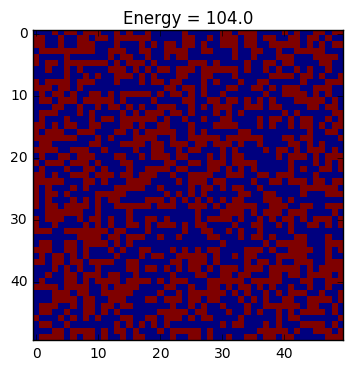

In [6]:
fig, ax = plt.subplots()
plot_state(x0, ax)

### Hill climbing

In [7]:
%%time
x_hc, energies_hc = hill_climbing_ising(x0, Jij, H)

CPU times: user 10.3 s, sys: 131 ms, total: 10.4 s
Wall time: 11.2 s


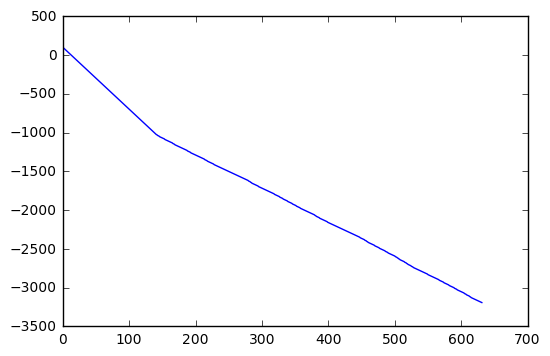

In [8]:
plt.plot(energies_hc)

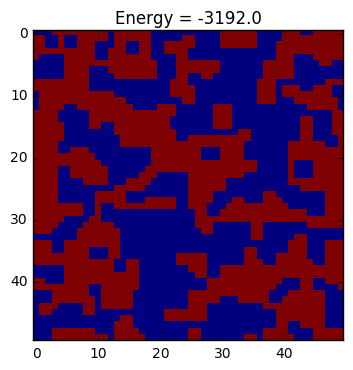

In [9]:
fig, ax = plt.subplots()
plot_state(x_hc, ax)

### Simulated annealing

In [10]:
%%time
x_sa, energies_sa = simulated_annealing_ising(x0, Jij=Jij, H=H, Tmax=100, Tmin=0.01, r=0.7, kT=1000)

CPU times: user 458 ms, sys: 8.97 ms, total: 467 ms
Wall time: 501 ms


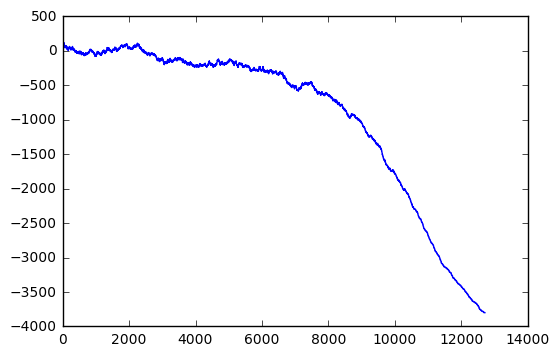

In [11]:
plt.plot(energies_sa)

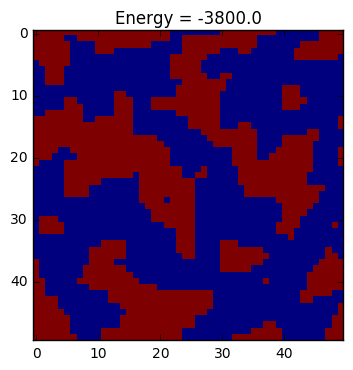

In [12]:
fig, ax = plt.subplots()
plot_state(x_sa, ax)

### Comparision of methods

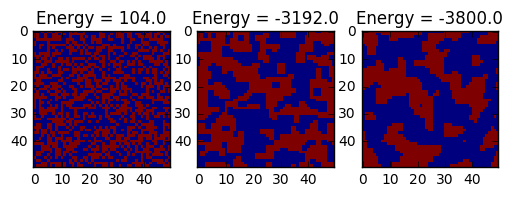

In [13]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3)

plot_state(x0, ax0)
plot_state(x_hc, ax1)
plot_state(x_sa, ax2)